In [1]:
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.tools import input_factory, plot_tools, spike_tools
from neurodynex3.neuron_type import neurons
from helpers import *
%load_ext autoreload
%autoreload 2

# Ex. 0 Getting Started: Soma Compartment

In [2]:
# constant
TAU_s = 16 * b2.ms # membrane time scale
TAU_w_s = 100 * b2.ms # adaptation time scale
E_L = -70 * b2.mV # resting membrane potential
C_s = 370 * b2.pF # membrane capacitance
E_th = -50 * b2.mV # spike threshold
b_w_s = -200 * b2.pA # used to update w after spike event
T_ref = 3*b2.ms # refractory period

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup')
nr of spikes: 8


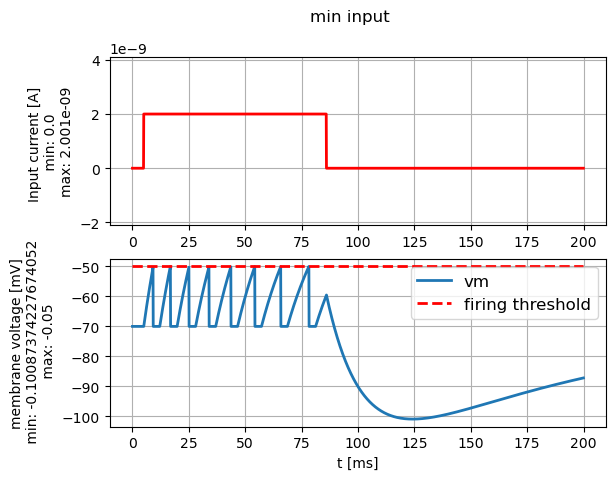

In [3]:
# testing simulate_soma
step_current = input_factory.get_step_current(t_start=5, t_end=85, unit_time=b2.ms, amplitude=2.001*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref)
# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=E_th)
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 0.1
Stimulate the neuron with a step current of 80ms. Create a figure of three plots: the input
I(s) on the top, voltage v(s) in the middle, and adaptation term w(s) at bottom. Find the minimum
amplitude (in nA, round to the second decimal) required to trigger spike. Make sure these variables
are stored in the ‘StateMonitor’ of your model function

In [9]:
# Step current of 80ms with I_min (here we find 0.47 nA)
step_current = input_factory.get_step_current(t_start=20, t_end=100, unit_time=b2.ms, amplitude=0.47*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref)

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_1')


nr of spikes: 1


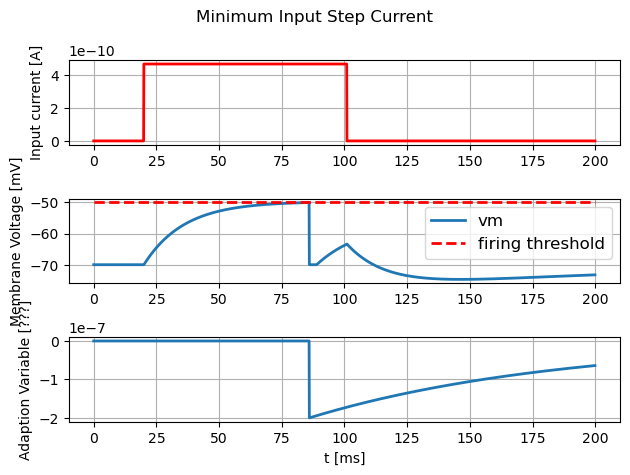

In [29]:
# plot I and vm
plot_I_v_w(state_monitor, step_current, title="Minimum Input Step Current", firing_threshold=E_th)
print("nr of spikes: {}".format(spike_monitor.count[0]))

### 0.2
Stimulate with a moderately large step current to get at least 5 spikes. Plot the spike train,
what is the role of the adaptive term w(s)?

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup')
nr of spikes: 4


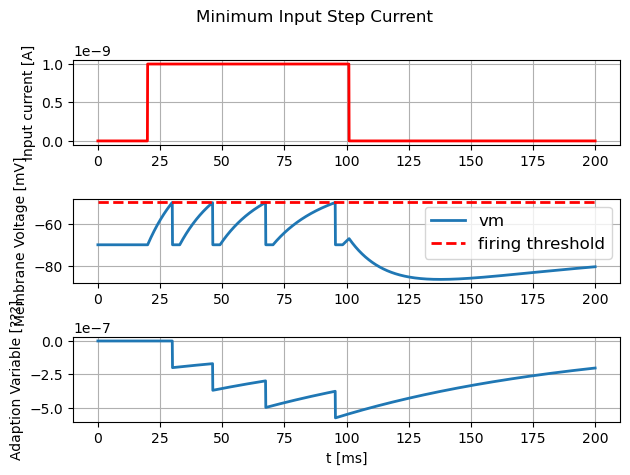

In [30]:
# Step current of 80ms with I_min (here we find 0.47 nA)
step_current = input_factory.get_step_current(t_start=20, t_end=100, unit_time=b2.ms, amplitude=1*b2.nA)
(state_monitor,spike_monitor) = simulate_soma(tau_s=TAU_s, C=C_s, v_rest=E_L, b=b_w_s, v_spike=E_th, tau_w=TAU_w_s, I_stim=step_current, T_refractory=T_ref)
# plot I and vm
plot_I_v_w(state_monitor, step_current, title="Minimum Input Step Current", firing_threshold=E_th)
print("nr of spikes: {}".format(spike_monitor.count[0]))